In [11]:
# -*- coding: utf-8 -*-

import numpy as np
import cv2

print(cv2.__version__)


# img = cv2.imread('/home/tong/下载/opencv_intel/opencv1.jpeg',cv2.IMREAD_COLOR)#读入一副彩色图像。图像的透明度会被忽略   默认参数。
# img = cv2.imread('/home/tong/下载/opencv_intel/opencv1.jpeg', cv2.IMREAD_GRAYSCALE)# Load an color image in grayscale 灰度
img = cv2.imread('/home/tong/下载/opencv_intel/opencv1.jpeg',cv2.IMREAD_UNCHANGED)#包括图像的 alpha 通道

img = cv2.resize(img, (640, 480))


rows,cols,ch=img.shape
print('行/高:',rows,'列/宽:',cols,'通道:',ch)
#图像的宽对应的是列数, 高对应的是行数。

cv2.namedWindow('image', cv2.WINDOW_NORMAL)#可以调整窗口大小
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)#自动调整
cv2.namedWindow('image', cv2.WINDOW_KEEPRATIO)#保持图片比例

cv2.resizeWindow('image', 200, 200)  

cv2.imshow('image', img)#窗口会自动调整为图像大小
# 在窗口上按任意键退出
cv2.waitKey(delay=0)#返回按键的 ASCII 码值

cv2.destroyAllWindows()

#
# cv2.imwrite('messigray.png', img)


4.1.0-openvino
行/高: 480 列/宽: 640 通道: 3


In [10]:
# -*- coding: utf-8 -*-
import numpy as np
import cv2

'''
• img: 你想绘制的图像。
• color: 颜色。以RGB为例  需要传入一个元组BGR 例如 255,0,0 代表蓝色，
第一个是蓝色通道，第二个是绿色通道，第三个是红色通道。对于灰度图只需要传入灰度值。
• thickness 线条的粗细。如果给一个闭合图形 置为 -1  那么这个图形
就会被填充。 默认值是 1.
• linetype 线条的类型，8连接，抗锯齿等。  默认情况是8连接。cv2.LINE_AA为抗锯齿.这样看起来会非常平滑。
'''

# Create a black image
img = np.zeros((512, 512, 3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
cv2.line(img, pt1=(0, 0), pt2=(511, 511), color=(255, 0, 0), thickness=5)  # pt1, pt2, color, thickness=
cv2.arrowedLine(img,pt1=(21, 13), pt2=(151, 461), color=(255, 0, 0), thickness=5)

cv2.rectangle(img, (354, 0), (518, 128), (0, 255, 0), 3)

cv2.circle(img, center=(447, 63), radius=63, 
           color=(0, 0, 255), thickness=-1)  # center, radius, color, thickness=None

# 一个参数是中心点的位置坐标。 下一个参数是长轴和短轴的长度。椭圆沿逆时针方向旋转的角度。
# 椭圆弧演顺时针方向起始的角度和结束角度 如果是 0 很 360 就是整个椭圆
cv2.ellipse(img, center=(256, 256), axes=(100, 50), angle=0, startAngle=0, endAngle=180, color=255,
            thickness=-1)  # center, axes, angle, startAngle, endAngle, color, thickness=

pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
# 这里 reshape 的第一个参数为-1, 表明这一维的长度是根据后面的维度的计算出来的。
# 注意 如果第三个参数是 False 我们得到的多边形是不闭合的 ，首尾不相连 。

font = cv2.FONT_HERSHEY_SIMPLEX
#org :Bottom-left corner of the text string in the image.左下角
#或使用 bottomLeftOrigin=True,文字会上下颠倒
cv2.putText(img, text='intel', org=(10, 400), 
            fontFace=font, fontScale=1, color=(255, 255, 255), thickness=1,bottomLeftOrigin=True)#text, org, fontFace, fontScale, color, thickness=
cv2.putText(img, text='OpenCV', org=(10, 500), fontFace=font, 
            fontScale=4, color=(255, 255, 255), thickness=2)#text, org, fontFace, fontScale, color, thickness=

# 所有的绘图函数的返回值都是 None ，所以不能使用 img = cv2.line(img,(0,0),(5

winname = 'example'
cv2.namedWindow(winname, 0)
cv2.imshow(winname, img)

cv2.imwrite("example.png", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
"""
draw_opencv_logo.py:Try to create the logo of OpenCV using drawing functions available in OpenCV.
"""

import numpy as np
import cv2  # 3.0.0-dev
import math

r1 = 70
r2 = 30

ang = 60

d = 170
h = int(d / 2 * math.sqrt(3))

dot_red = (256, 128)
dot_green = (int(dot_red[0] - d / 2), dot_red[1] + h)
dot_blue = (int(dot_red[0] + d / 2), dot_red[1] + h)

# tan = float(dot_red[0]-dot_green[0])/(dot_green[1]-dot_red[0])
# ang = math.atan(tan)/math.pi*180

red = (0, 0, 255)
green = (0, 255, 0)
blue = (255, 0, 0)
black = (0, 0, 0)

full = -1

img = np.zeros((512, 512, 3), np.uint8)
# img = np.ones((512, 512, 3), np.uint8)

cv2.circle(img, dot_red, r1, red, full)
cv2.circle(img, dot_green, r1, green, full)
cv2.circle(img, dot_blue, r1, blue, full)
cv2.circle(img, dot_red, r2, black, full)
cv2.circle(img, dot_green, r2, black, full)
cv2.circle(img, dot_blue, r2, black, full)

cv2.ellipse(img, dot_red, (r1, r1), ang, 0, ang, black, full)
cv2.ellipse(img, dot_green, (r1, r1), 360 - ang, 0, ang, black, full)
cv2.ellipse(img, dot_blue, (r1, r1), 360 - 2 * ang, ang, 0, black, full)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, text='OpenCV', org=(15, 450), fontFace=font, 
            fontScale=4, color=(255, 255, 255), thickness=10)#text,

cv2.imwrite("opencv_logo.png", img)
cv2.imshow('image', img)#窗口会自动调整为图像大小
# cv2.imwrite("opencv_logo2.png", img)

In [ ]:
"""
画圆圈.py:随机覆盖，不同颜色，
"""
from time import sleep
import cv2
import numpy as np


def click_event(event, x, y, flags, param):
    '''
    用左键点击屏幕，打印坐标
    :param event:
    :param x:
    :param y:
    :param flags:
    :param param:
    :return:
    '''
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x, y, flags, param)


cv2.namedWindow('Canvas', cv2.WINDOW_GUI_EXPANDED)
cv2.setMouseCallback("Canvas", click_event)

canvas = np.zeros((300, 300, 3), dtype="uint8")
while True:
    try:
        for i in range(0, 25):
            radius = np.random.randint(5, high=200)
            color = np.random.randint(0, high=256, size=(3,)).tolist()
            pt = np.random.randint(0, high=300, size=(2,))
            cv2.circle(canvas, tuple(pt), radius, color, -1)

        cv2.imshow("Canvas", canvas)

        key = cv2.waitKey(1000)  # 等待1秒
        if key == ord('q'):
            break
        else:
            # sleep(1)
            continue
    except KeyboardInterrupt as e:
        print('KeyboardInterrupt', e)
    finally:
        cv2.imwrite('random-circles2.jpg', canvas)

98 137 0 None
194 171 0 None
232 42 0 None
278 139 0 None
197 284 0 None
207 141 0 None
129 69 0 None
109 217 0 None
113 94 0 None
66 97 0 None
196 234 0 None
167 89 0 None
195 37 0 None
137 203 0 None
239 253 0 None
KeyboardInterrupt 
KeyboardInterrupt 
KeyboardInterrupt 
KeyboardInterrupt 


In [3]:
import cv2

# 读取一张照片
img = cv2.imread('/home/tong/下载/opencv_intel/opencv1.jpeg')

# 缩放成200x200的方形图像
img_200x200 = cv2.resize(img, (200, 200))

# 不直接指定缩放后大小，通过fx和fy指定缩放比例，0.5则长宽都为原来一半
# 等效于img_200x300 = cv2.resize(img, (300, 200))，注意指定大小的格式是(宽度,高度)
# 插值方法默认是cv2.INTER_LINEAR，这里指定为最近邻插值
img_200x300 = cv2.resize(img, (0, 0), fx=0.5, fy=0.5, 
                              interpolation=cv2.INTER_NEAREST)

# 在上张图片的基础上，上下各贴50像素的黑边，生成300x300的图像
img_300x300 = cv2.copyMakeBorder(img, 50, 50, 0, 0, 
                                       cv2.BORDER_CONSTANT, 
                                       value=(0, 0, 0))

# 对照片中部分进行剪裁
patch_tree = img[20:150, -180:-50]

cv2.imwrite('cropped.jpg', patch_tree)
cv2.imwrite('resized_200x200.jpg', img_200x200)
cv2.imwrite('resized_200x300.jpg', img_200x300)
cv2.imwrite('bordered_300x300.jpg', img_300x300)

True

In [8]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np
#拆分及合并图像通道

img = cv2.imread('/home/tong/下载/opencv_intel/opencv1.jpeg')

#
b,g,r=cv2.split(img)#比较耗时的操作，请使用numpy 索引
img=cv2.merge((b,g,r))
#
b=img[:,:,0]

#使所有像素的红色通道值都为 0,你不必先拆分再赋值。
# 你可以 直接使用 Numpy 索引,这会更快。
img[:,:,2]=0

#保存到文件，看下效果
cv2.imwrite(filename='split_color2.jpg',img=img)

True

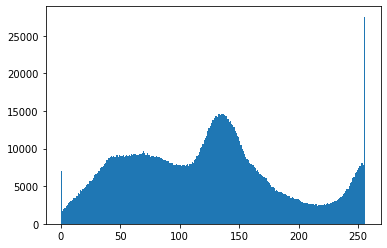

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/home/tong/下载/opencv_intel/opencv1.jpeg')
# img.ravel() 将图像转成一维数组   没有中括号
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

In [ ]:
import numpy as np
import cv2

# cap = cv2.VideoCapture(0)  # 一般的laptop有内置摄像头。所以参数就是 0。你可以设置成1或者其他的来选择别的摄像头
cap = cv2.VideoCapture("/home/tong/视频/toy_flower.mp4")
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)#4 ，720
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)#3，1280
frame_height=int(480/frame_width*frame_height)#270
ret = cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_height)#高
ret = cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)



# while (True):
while cap.isOpened():  # 检查是否成功初始化，否则就使用函数 cap.open()
    # Capture frame-by-frame
    ret, frame = cap.read()  # ret 返回一个布尔值 True/False
    # print('frame shape:',frame.shape)#(720, 1280, 3)

    frame = cv2.flip(frame, flipCode=1)  # 左右翻转,使用笔记本电脑摄像头才有用。
    # flipCode：翻转方向：1：水平翻转；0：垂直翻转；-1：水平垂直翻转

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame', gray)
    cv2.setWindowTitle('frame', 'COLOR_BGR2GRAY')


    key = cv2.waitKey(delay=10)
    if key == ord("q"):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture("/home/tong/视频/toy_flower.mp4")
# cap = cv2.VideoCapture('output.avi')
# cap = cv2.VideoCapture('Minions_banana.mp4')


# 帧率
fps = cap.get(cv2.CAP_PROP_FPS)  # 25.0
print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
# 总共有多少帧
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print('共有', num_frames, '帧')
#
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print('高：', frame_height, '宽：', frame_width)

FRAME_NOW = cap.get(cv2.CAP_PROP_POS_FRAMES)  # 第0帧
print('当前帧数', FRAME_NOW)  # 当前帧数 0.0

# 读取指定帧
frame_no = 121
cap.set(1, frame_no)  # Where frame_no is the frame you want
ret, frame = cap.read()  # Read the frame
cv2.imshow('frame_no'+str(frame_no), frame)

FRAME_NOW = cap.get(cv2.CAP_PROP_POS_FRAMES)
print('当前帧数', FRAME_NOW)  # 当前帧数 122.0

while cap.isOpened():
    ret, frame = cap.read()
    FRAME_NOW = cap.get(cv2.CAP_PROP_POS_FRAMES)  # 当前帧数
    print('当前帧数', FRAME_NOW)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame', gray)
    key = cv2.waitKey(1)
    if key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
width = 640
ret = cap.set(3, width)
height = 480
ret = cap.set(4, height)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # opencv 3.0
# Error: 'module' object has no attribute 'VideoWriter_fourcc'
# fourcc=cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
#jpeg,h263,'m', 'p', '4', 'v'

#
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if ret is True:

        frame = cv2.resize(frame, (640, 480))

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame', frame)

    else:
        break

    key = cv2.waitKey(1)
    if key == ord("q"):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()